<a href="https://colab.research.google.com/github/njpinton/CMSC173/blob/main/LinearRegression/Linear_Regression_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Animated Visualization of Gradient Descent for Linear Regression

In this example, we apply **batch gradient descent** to a simple linear regression problem,  
where the input \(x\) represents **house sizes** (in square meters) and the output \(y\) represents **house prices** (in thousands of dollars).

The learning algorithm updates the parameters \(\theta_0\) (intercept) and \(\theta_1\) (slope) step by step by minimizing the **cost function**:

$$
J(\theta_0, \theta_1)
= \frac{1}{2m} \sum_{i=1}^{m} \Big( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \Big)^2.
$$

- At each iteration, the regression line is redrawn on top of the scatter plot of the data.  
- The dashed lines show the **residuals** (errors) between predictions and true values.  
- A box displays the current cost \(J(\theta)\), as well as the evolving parameter values $\theta_0$ and $\theta_1$.  
- Watching the animation makes it clear how gradient descent gradually reduces the error.  

---

⚠️ **Important:**  
The next code cell does **not** normalize the input features.  
This means the learning rate $\alpha$ must be chosen very small to prevent divergence, since the raw feature values are large.  
In the following cell after that, we introduce **normalization** of inputs (subtracting the mean and dividing by the standard deviation) to stabilize and accelerate convergence.

---

❓ **Question for you to think about:**  
What differences do you expect to observe between gradient descent **with raw inputs** versus **with normalized inputs** in terms of convergence speed and stability?


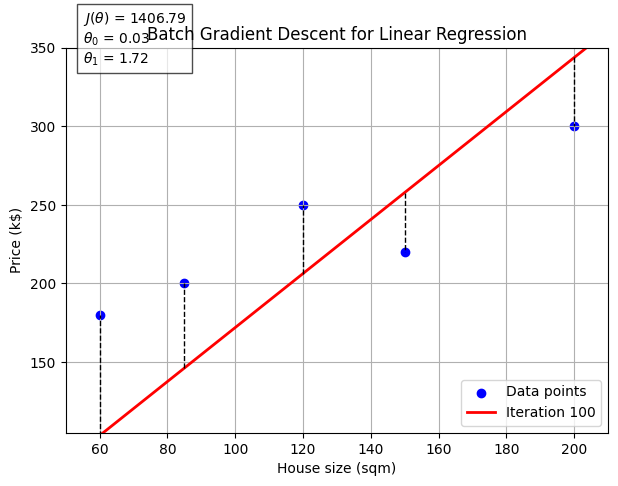

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# ------------------------
# Example dataset
# ------------------------
x = np.array([85, 120, 60, 200, 150], dtype=float)
y = np.array([200, 250, 180, 300, 220], dtype=float)
m = len(x)

# ------------------------
# Gradient descent setup
# ------------------------
alpha = 1e-5      # learning rate (small because x is large)
iterations = 100
theta0, theta1 = 0.0, 0.0

# Fixed axis limits for plotting
x_min, x_max = min(x) - 10, max(x) + 10
y_min, y_max = min(y) - 75, max(y) + 50

# ------------------------
# Gradient descent loop
# ------------------------
for t in range(iterations):
    # Predictions
    y_hat = theta0 + theta1 * x

    # Residuals
    residuals = y - y_hat

    # Cost function
    J = (1/(2*m)) * np.sum(residuals**2)

    # Gradients
    grad0 = -(1/m) * np.sum(residuals)
    grad1 = -(1/m) * np.sum(residuals * x)

    # Update
    theta0 -= alpha * grad0
    theta1 -= alpha * grad1

    # ------------------------
    # Plot update
    # ------------------------
    clear_output(wait=True)
    plt.figure(figsize=(7,5))
    plt.scatter(x, y, color='blue', label="Data points")

    # Regression line
    x_line = np.linspace(x_min, x_max, 100)
    y_line = theta0 + theta1 * x_line
    plt.plot(x_line, y_line, color='red', linewidth=2, label=f"Iteration {t+1}")

    # Residuals
    for xi, yi, y_hat_i in zip(x, y, y_hat):
        plt.plot([xi, xi], [y_hat_i, yi], 'k--', linewidth=1)

    # Display parameter values
    plt.text(x_min + 5, y_max - 50,
             f"$J(\\theta)$ = {J:.2f}\n"
             f"$\\theta_0$ = {theta0:.2f}\n"
             f"$\\theta_1$ = {theta1:.2f}",
             fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

    plt.xlabel("House size (sqm)")
    plt.ylabel("Price (k$)")
    plt.title("Batch Gradient Descent for Linear Regression")
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

    time.sleep(0.01)  # delay for animation


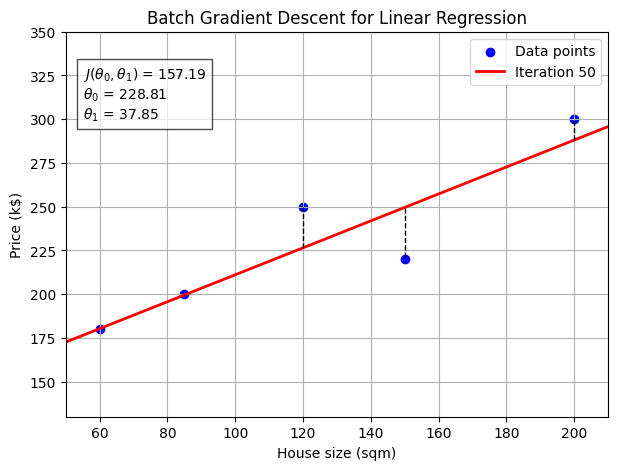

Please note that the inputs are normalized, so postprocessing is needed to get the correct prediction.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output

# ------------------------
# Example dataset
# ------------------------
x_raw = np.array([85, 120, 60, 200, 150], dtype=float)
y = np.array([200, 250, 180, 300, 220], dtype=float)

# Normalize x for stable gradient descent
x_mean, x_std = x_raw.mean(), x_raw.std()
x = (x_raw - x_mean) / x_std
m = len(x)

# ------------------------
# Gradient descent setup
# ------------------------
alpha = 0.1        # learning rate
iterations = 50
theta0, theta1 = 0.0, 0.0

# ------------------------
# Fixed axis limits
# ------------------------
x_min, x_max = min(x_raw) - 10, max(x_raw) + 10
y_min, y_max = min(y) - 50, max(y) + 50

# ------------------------
# Gradient descent loop
# ------------------------
for t in range(iterations):
    # Predictions
    y_hat = theta0 + theta1 * x

    # Compute residuals
    residuals = y - y_hat

    # Cost function
    J = (1/(2*m)) * np.sum(residuals**2)

    # Gradients
    grad0 = -(1/m) * np.sum(residuals)
    grad1 = -(1/m) * np.sum(residuals * x)

    # Update
    theta0 -= alpha * grad0
    theta1 -= alpha * grad1

    # ------------------------
    # Plot update
    # ------------------------
    clear_output(wait=True)
    plt.figure(figsize=(7,5))
    plt.scatter(x_raw, y, color='blue', label="Data points")

    # Fitted line (convert back to raw scale for plotting)
    x_line = np.linspace(x_min, x_max, 100)
    x_line_norm = (x_line - x_mean) / x_std
    y_line = theta0 + theta1 * x_line_norm
    plt.plot(x_line, y_line, color='red', linewidth=2, label=f"Iteration {t+1}")

    # Residuals
    for xi, yi, y_hat_i in zip(x_raw, y, y_hat):
        plt.plot([xi, xi], [y_hat_i, yi], 'k--', linewidth=1)

    # Display current values on the plot
    plt.text(x_min + 5, y_max - 50,
             f"$J(\\theta_0, \\theta_1)$ = {J:.2f}\n"
             f"$\\theta_0$ = {theta0:.2f}\n"
             f"$\\theta_1$ = {theta1:.2f}",
             fontsize=10, bbox=dict(facecolor="white", alpha=0.7))

    plt.xlabel("House size (sqm)")
    plt.ylabel("Price (k$)")
    plt.title("Batch Gradient Descent for Linear Regression")
    plt.legend()
    plt.grid(True)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.show()

    time.sleep(0.01)  # delay for animation

print("Please note that the inputs are normalized, so postprocessing is needed to get the correct prediction.")

In [ ]:
# ------------------------
# Prediction function
# ------------------------
def predict(x_new):
    """
    Predict y for new x values using the trained theta0 and theta1.
    Automatically applies the same normalization.
    """
    x_new_norm = (x_new - x_mean) / x_std
    return theta0 + theta1 * x_new_norm


# x = np.array([85, 120, 60, 200, 150], dtype=float)
# y = np.array([200, 250, 180, 300, 220], dtype=float)
x_test = np.array([85, 120, 60, 200, 150])
y_pred = predict(x_test)
print(f"Predictions for x ={x_test} are y = {y_pred}")

Predictions for x =[ 85 120  60 200 150] are y = [199.55396418 226.504579   180.30352502 288.10598431 249.60510599]


### Closed-Form Solution (Ordinary Least Squares)

Before using gradient descent, it’s useful to see that linear regression also has a **closed-form solution**.  
This method directly computes the optimal slope $\theta_1$ and intercept $\theta_0$ using the **least squares formula**:

$$
\theta_1 \;=\;
\frac{\sum_{i=1}^m \big(x^{(i)} - \bar{x}\big)\,\big(y^{(i)} - \bar{y}\big)}
     {\sum_{i=1}^m \big(x^{(i)} - \bar{x}\big)^2},
\quad
\theta_0 \;=\; \bar{y} - \theta_1 \bar{x}.
$$

- Here, $\bar{x}$ and $\bar{y}$ are the means of the input and output data.  
- This formula minimizes the sum of squared residuals in **one step**, without iterations.  
- It provides a baseline for comparison with the iterative gradient descent method.  

---

⚠️ **Note:**  
- The next cell **hard-codes the solution** using the explicit mean-based formulas above.  
- The following cell instead uses **NumPy’s `linalg` functions**, which solve the system of equations in matrix form.  

❓ **Question to think about:**  
What do you think is the difference between manually coding the formulas versus using `numpy.linalg`?  
(Consider numerical stability, extensibility to multiple features, and ease of implementation.)


In [ ]:
import numpy as np

# Data
x_raw = np.array([85, 120, 60, 200, 150], dtype=float)
y = np.array([200, 250, 180, 300, 220], dtype=float)

# Means
x_mean = np.mean(x_raw)
y_mean = np.mean(y)

# Compute slope (theta1) and intercept (theta0)
theta1 = np.sum((x_raw - x_mean) * (y - y_mean)) / np.sum((x_raw - x_mean)**2)
theta0 = y_mean - theta1 * x_mean

theta0, theta1


(np.float64(134.79718543046357), np.float64(0.7740066225165563))

In [ ]:
import numpy as np

# Data
x_raw = np.array([85, 120, 60, 200, 150], dtype=float)
y = np.array([200, 250, 180, 300, 220], dtype=float)

# Design matrix: add a column of ones for the intercept term
X = np.column_stack((np.ones_like(x_raw), x_raw))

# Solve using least squares
theta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)

theta0, theta1 = theta
theta0, theta1

(np.float64(134.79718543046363), np.float64(0.7740066225165558))

### Visualizing Gradient Descent on the Loss Surface

Up to this point, we have seen gradient descent in 2D plots (data + regression line).  
To gain a deeper understanding, we can visualize the **loss function** directly in 3D.  

- The cost function for linear regression is given by:

$$
J(\theta_0, \theta_1)
= \frac{1}{2m} \sum_{i=1}^m \Big( y^{(i)} - \big(\theta_0 + \theta_1 x^{(i)}\big) \Big)^2.
$$

- By varying the parameters $\theta_0\$ and $\theta_1\$, we can compute the corresponding cost $J$.  
- This produces a 3D **loss surface**, where the lowest point represents the optimal solution.  
- The red path drawn on the surface shows how gradient descent iteratively updates $\theta_0, \theta_1$ and moves downhill toward the minimum.  

This visualization helps build intuition:  
gradient descent is essentially a path-finding algorithm that follows the slope of the loss surface until convergence.


Final parameters: theta0 = 2.313, theta1 = 1.282


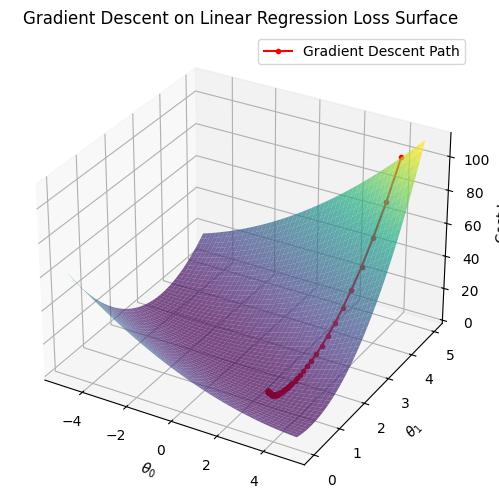

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# 1. Sample data (toy dataset)
# ----------------------------
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([2, 3, 5, 7, 11], dtype=float)
# x = np.array([85, 120, 60, 200, 150], dtype=float)
# y = np.array([200, 250, 180, 300, 220], dtype=float)
n = len(x)

# ----------------------------
# 2. Hyperparameters
# ----------------------------
alpha = 0.01      # learning rate
num_iter = 100    # number of iterations

# ----------------------------
# 3. Initialize parameters
# ----------------------------
theta0, theta1 = 4, 5  # initial guess
theta0_history = [theta0]
theta1_history = [theta1]

# Compute initial cost
y_hat = theta0 + theta1 * x
r = y_hat - y
J_history = [(1/(2*n))*np.sum(r**2)]

# ----------------------------
# 4. Gradient descent loop
# ----------------------------
for it in range(num_iter):
    # predictions
    y_hat = theta0 + theta1 * x
    # residuals
    r = y_hat - y
    # gradients
    dtheta0 = (1/n) * np.sum(r)
    dtheta1 = (1/n) * np.sum(r * x)
    # parameter update
    theta0 -= alpha * dtheta0
    theta1 -= alpha * dtheta1
    # store history
    theta0_history.append(theta0)
    theta1_history.append(theta1)
    # compute new cost
    y_hat = theta0 + theta1 * x
    r = y_hat - y
    J = (1/(2*n)) * np.sum(r**2)
    J_history.append(J)

print("Final parameters: theta0 = {:.3f}, theta1 = {:.3f}".format(theta0, theta1))

# ----------------------------
# 5. 3D Loss surface
# ----------------------------
theta0_vals = np.linspace(-5, 5, 50)
theta1_vals = np.linspace(0, 5, 50)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        y_hat_grid = t0 + t1 * x
        J_vals[i, j] = (1/(2*n)) * np.sum((y - y_hat_grid)**2)

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Plot
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals.T, cmap='viridis', alpha=0.7)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost J')

# overlay gradient descent path
ax.plot(theta0_history, theta1_history, J_history, color='r', marker='o', markersize=3, label='Gradient Descent Path')
ax.legend()
plt.title("Gradient Descent on Linear Regression Loss Surface")
plt.show()
